In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats
#Single CHO cell dry mass: 280 pg/cell. Ref:https://doi.org/10.1016/j.ymben.2021.03.013
#Single mammalian cell dry mass: 264pg/cell. Ref: https://doi.org/10.1016/j.ymben.2020.06.002 

In [3]:
def add_linear(ax, xdata, ydata):
    def func(x, a, b):
        return a * x + b
    popt, pcov = curve_fit(func, xdata, ydata)
    temp_x = np.linspace(min(xdata),max(xdata) )
    ax.plot(temp_x, func(temp_x, *popt),'r--')
    
def get_pv(x,y):
    coeff, pv = stats.pearsonr( x, y)
    return pv

def get_pcc(x,y):
    coeff, pv = stats.pearsonr( x, y)
    return coeff

In [4]:
data_low=pd.read_csv('../data/exp_data/CultureData_lowNH4.csv')
data_low=data_low.rename(columns={'Biomass_avg(g/L)':'Biomass_avg','Biomass_std(g/L)':'Biomass_std'})
data_high=pd.read_csv('../data/exp_data/CultureData_highNH4.csv')
data_high=data_high.rename(columns={'Biomass_avg(g/L)':'Biomass_avg','Biomass_std(g/L)':'Biomass_std'})

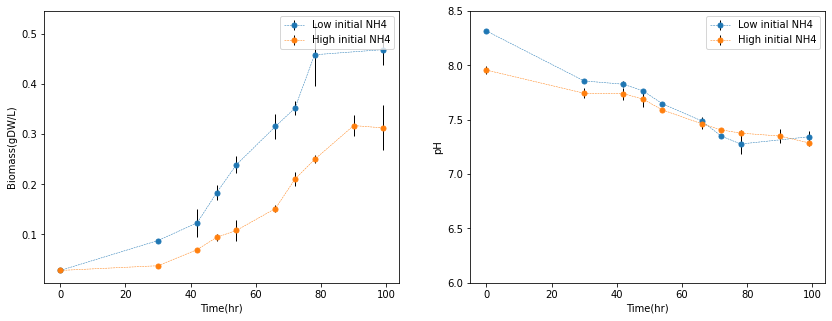

In [23]:
fig,axs=plt.subplots(1,2,figsize=(14,5))
axs[0].errorbar(data_low.Time,data_low.Biomass_avg,yerr= data_low.Biomass_std, ecolor='black',
                      marker='o', markersize=5, linestyle='--', linewidth=0.5, elinewidth=1,label='Low initial NH4')
axs[0].errorbar(data_high.Time,data_high.Biomass_avg,yerr= data_high.Biomass_std, ecolor='black',
                      marker='o', markersize=5, linestyle='--', linewidth=0.5, elinewidth=1,label='High initial NH4')
axs[0].set_ylabel('Biomass(gDW/L)')
axs[1].errorbar(data_low.Time,data_low.pH_avg,yerr= data_low.pH_std, ecolor='black',
                      marker='o', markersize=5, linestyle='--', linewidth=0.5, elinewidth=1,label='Low initial NH4')
axs[1].errorbar(data_high.Time, data_high.pH_avg,yerr= data_high.pH_std, ecolor='black',
                      marker='o', markersize=5, linestyle='--', linewidth=0.5, elinewidth=1,label='High initial NH4')
axs[1].set_ylim([6,8.5])
axs[1].set_ylabel('pH')
for ax in axs:
    ax.legend()
    ax.set_xlabel('Time(hr)')

Text(0, 0.5, 'Concentration (mM)')

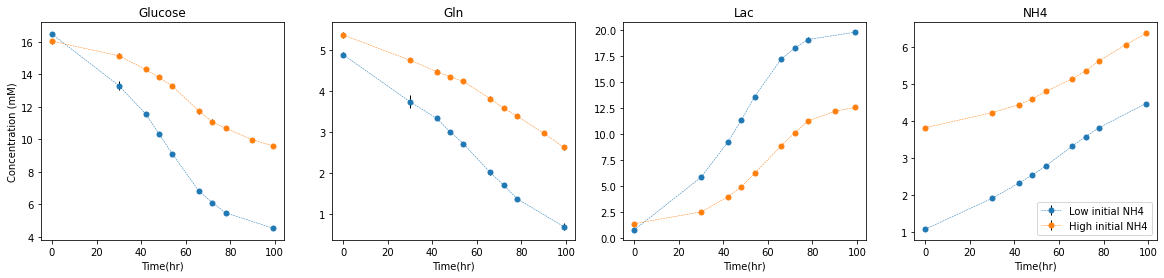

In [29]:
fig, axs = plt.subplots(1,4,figsize=(20,4))
ynames=['Glucose','Gln','Lac','NH4']
for i in range(4):
    axs[i].errorbar(data_low.Time,data_low[ynames[i]+'_avg'],yerr= data_low[ynames[i]+'_std'], ecolor='black',
                      marker='o', markersize=5, linestyle='--', linewidth=0.5, elinewidth=1,label='Low initial NH4')
    axs[i].errorbar(data_high.Time,data_high[ynames[i]+'_avg'],yerr= data_high[ynames[i]+'_std'], ecolor='black',
                      marker='o', markersize=5, linestyle='--', linewidth=0.5, elinewidth=1,label='High initial NH4')
    axs[i].set_xlabel('Time(hr)')
    axs[i].set_title(ynames[i])
axs[3].legend(loc='lower right')
axs[0].set_ylabel('Concentration (mM)')

In [5]:
def get_grs(biomass, time_pts):
    output = []
    for i in range(len(biomass)-1):
        output.append( np.log(biomass[i+1]/biomass[i]) /(time_pts[i+1]-time_pts[i]) )
    return output  
def avg_cons(cons,time_pts):
    output = []
    for i in range(len(cons)-1):
        output.append( (cons[i+1]+cons[i])/2 )
    return output
def norm_rates(biomass, cons, time_pts):
    output = []
    for i in range(len(biomass)-1):
        output.append( ((cons[i+1]-cons[i])/(biomass[i]/2+biomass[i+1]/2) )/(time_pts[i+1]-time_pts[i]) )
    return output

In [6]:
Ts= [data.Time[i]/2+data.Time[i+1]/2 for i in range(len(data.Time)-1)]
grs=get_grs(data.Biomass_avg, data.Time)
growth_data = pd.DataFrame(zip(Ts,grs),columns=['Time','gr'])
mets=['Glucose','Gln','Lac','NH4']
for met in mets:
    growth_data[met+'_rate']=norm_rates( data.Biomass_avg, data[met+'_avg'], data.Time)

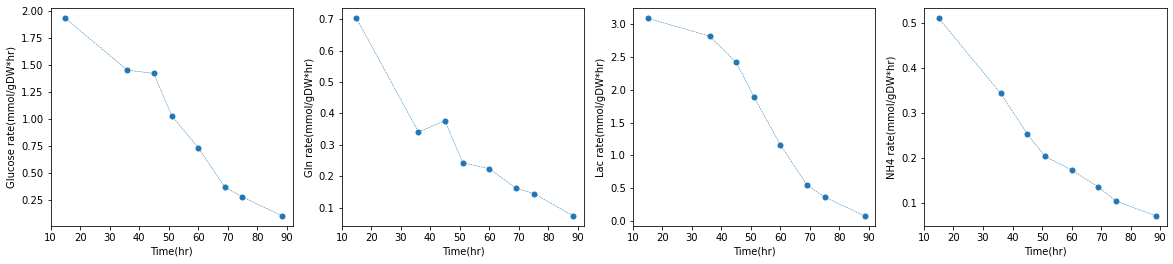

In [7]:
fig, axs = plt.subplots(1,4,figsize=(20,4))
ynames=['Glucose','Gln','Lac','NH4']
for i in range(4):
    if i <2:
        y=(-1)*growth_data[ynames[i]+'_rate']
    else:
        y=growth_data[ynames[i]+'_rate']
    axs[i].plot(Ts, y,marker='o', markersize=5, linestyle='--', linewidth=0.5)
    axs[i].set_xlabel('Time(hr)')
    axs[i].set_xticks(np.arange(10,100,10))
    axs[i].set_ylabel(ynames[i]+' rate(mmol/gDW*hr)')

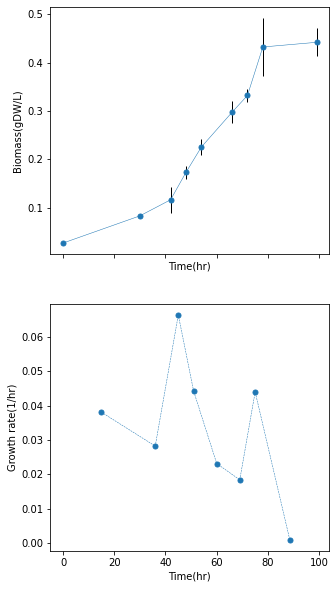

In [8]:
fig, axs = plt.subplots(2,1,figsize=(5,10),sharex=True)
axs[0].errorbar(data.Time,data.Biomass_avg,yerr= data.Biomass_std, ecolor='black',
                      marker='o', markersize=5, linestyle='-', linewidth=0.5, elinewidth=1);
axs[0].set_ylabel('Biomass(gDW/L)')
axs[1].plot(Ts, grs,marker='o', markersize=5, linestyle='--', linewidth=0.5)
axs[1].set_ylabel('Growth rate(1/hr)')
for ax in axs:
    ax.set_xlabel('Time(hr)')

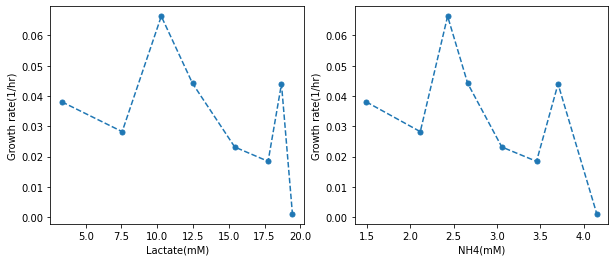

In [9]:
fig,axs=plt.subplots(1,2,figsize=(10,4))
temp_lac=[data.Lac_avg[i+1]/2+data.Lac_avg[i]/2 for i in range(len(data.index)-1)]
temp_nh4=[data.NH4_avg[i+1]/2+data.NH4_avg[i]/2 for i in range(len(data.index)-1)]
axs[0].plot(temp_lac,growth_data.gr,marker='o', markersize=5, linestyle='--')
axs[1].plot(temp_nh4,growth_data.gr,marker='o', markersize=5, linestyle='--')
for ax in axs:
    ax.set_ylabel('Growth rate(1/hr)')
axs[0].set_xlabel('Lactate(mM)'); axs[1].set_xlabel('NH4(mM)');

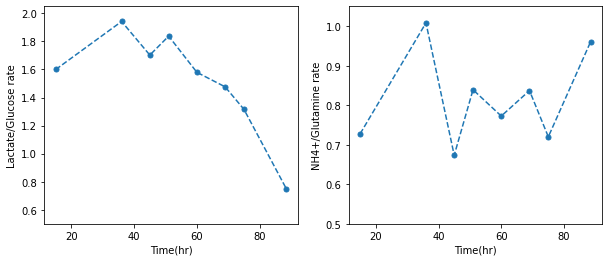

In [10]:
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(Ts,-1*growth_data.Lac_rate/growth_data.Glucose_rate,marker='o', markersize=5, linestyle='--')
axs[0].set_ylabel('Lactate/Glucose rate')
axs[1].plot(Ts,-1*growth_data.NH4_rate/growth_data.Gln_rate,marker='o', markersize=5, linestyle='--')
axs[1].set_ylabel('NH4+/Glutamine rate')
axs[0].set_ylim([0.5,2.05]); axs[1].set_ylim([0.5,1.05]);
for ax in axs:
    ax.set_xlabel('Time(hr)')

In [11]:
ATP_approx=[]
for i in range(len(growth_data.index)):
    lac_r=growth_data.Lac_rate[i];glc_r=(-1)*growth_data.Glucose_rate[i];gln_r=(-1)*growth_data.Gln_rate[i];
    gr=growth_data.gr[i]
    ATP_approx.append( lac_r + (glc_r-lac_r/2)*30 )
growth_data['ATP_estimated']=ATP_approx

In [12]:
growth_data

,Time,gr,Glucose_rate,Gln_rate,Lac_rate,NH4_rate,ATP_estimated
0,15.0,0.038070,-1.934669,-0.702590,3.095471,0.511160,14.703487
1,36.0,0.028229,-1.453222,-0.340948,2.822604,0.343743,4.080200
2,45.0,0.066352,-1.423002,-0.376903,2.422950,0.253833,8.768772
3,51.0,0.044171,-1.032652,-0.242813,1.897847,0.203739,4.409703
4,60.0,0.023156,-0.733344,-0.224254,1.158470,0.173239,5.781723
5,69.0,0.018421,-0.370582,-0.162350,0.547050,0.135880,3.458767
6,75.0,0.043982,-0.276063,-0.145296,0.363241,0.104613,3.196522
7,88.5,0.001054,-0.101620,-0.074037,0.076215,0.071134,1.981586


In [13]:
def func(x, a, b):
    return a * x + b
popt, pcov = curve_fit(func, growth_data.gr[1:6],growth_data.ATP_estimated[1:6])
print(popt)

[87.80346913  2.13315123]


0.8089400937810812


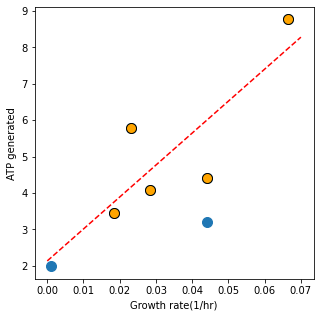

In [17]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.scatter(growth_data.gr[1:],growth_data.ATP_estimated[1:],s=100)
ax.scatter(growth_data.gr[1:6],growth_data.ATP_estimated[1:6],color='orange',s=100,edgecolor='black')
ax.set_ylabel('ATP generated')
ax.set_xlabel('Growth rate(1/hr)')
temp_x = np.linspace(0,0.07)
ax.plot(temp_x, func(temp_x, *popt),'r--')
y_pred = [func(x, 87.8, 2.13) for x in growth_data.gr[1:6]]
print( get_pcc(growth_data.ATP_estimated[1:6],y_pred) )